**Reporte Diario - Incidente Area TI, segun su criticidad.**


Aplicacion de dataframe, con el cual se puede gestionar los incidentes que continuamente llegan a la area de TI. Los incidentes son priorizados, segun la gravedad de estos y la empresa proveedora de servicios informaticos.

Los estados son los siguientes:

Donde **P0** son los issues con mayor urgencia de resolver y le siguen asi sucesivamente los P1, P2 y P3

In [1]:
### Montar Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
### Importar librerias
import pandas as pd
import numpy as np

In [3]:
##Importar archivo de Herramienta de gestion de issues
df = pd.read_excel('/content/drive/MyDrive/Colab Python/02. Obtencion y Procesamiento de Datos/issuesTI.xlsx')
df['Prioridad'] = df['Prioridad'].fillna("Sin Priorizar") ##Dejar espacios vacios de la columna "Prioridad" con valor "Sin Priorizar"
df_abiertos = df[df['Estado Real'] != 'CERRADO']
pvt_abiertos = pd.DataFrame(pd.pivot_table(df_abiertos, index=['Empresa Responsable', 'Estado Real'], columns= ['Prioridad'], values="Id",aggfunc = 'count',margins="true", fill_value = 0,margins_name = "TOTALES"))
pvt_abiertos["% P0"] = round(pvt_abiertos['P0']/(pvt_abiertos['P0'].sum() - pvt_abiertos['P0'][-1]) * 100,2)
pvt_abiertos = pvt_abiertos.reindex(columns=['% P0', 'P0', 'P1',	'P2',	'P3', 'Sin Priorizar', 'TOTALES']) 
###### Se crea dataframe para los cerrados
df_cerrados = df[df['Estado Real'] == 'CERRADO']
pvt_cerrados = pd.DataFrame(pd.pivot_table(df_cerrados, index=['Tipo de Cierre'], columns= ['Prioridad'], values="Id", aggfunc = 'count', margins="true", fill_value = 0,margins_name = "TOTALES"))
pvt_cerrados["% P0"] = round(pvt_cerrados['P0']/(pvt_cerrados['P0'].sum() - pvt_cerrados['P0'][-1]) * 100,2)
pvt_cerrados = pvt_cerrados.reindex(columns=['% P0', 'P0', 'P1',	'P2',	'P3', 'Sin Priorizar', 'TOTALES']) 
pvt_abiertos

Prioridad                              % P0   P0  ...  Sin Priorizar  TOTALES
Empresa Responsable Estado Real                   ...                        
ACCENTURE           ANALIZADO          6.90   16  ...              2       29
                    ASIGNADO          22.84   53  ...              1      119
                    DESARROLLO         4.31   10  ...              0       18
                    EN ANALISIS        3.88    9  ...              0       13
                    MONITOREO PRD      3.88    9  ...              0       12
                    PDTE NIVELACION    3.45    8  ...              2       17
                    PRUEBAS QA         3.02    7  ...              2       15
                    RELEASE PDTE QA    1.72    4  ...              0        4
EVERIS              ANALIZADO          8.62   20  ...              1       33
                    ASIGNADO          22.84   53  ...              5      112
                    DESARROLLO         3.02    7  ...              0        8
                    EN ANALISIS        5.17   12  ...              0       17
                    MONITOREO PRD      2.59    6  ...              0        9
                    PDTE NIVELACION    2.16    5  ...              0        7
                    PRUEBAS QA         3.45    8  ...              1       16
                    RELEASE PDTE QA    2.16    5  ...              0        6
TOTALES                              100.00  232  ...             14      435

[17 rows x 7 columns]

<font color='red'> En el Dataframe anterior, se require validar cuantos issues, tienen asignados cada empresa proveedora, el estado y tipo de priorizacion (urgencia).
</font>

In [4]:
pvt_cerrados

Prioridad,% P0,P0,P1,P2,P3,Sin Priorizar,TOTALES
Tipo de Cierre,,,,,,,
Error de Datos,10.50,138,140,9,36,22,345
Error de Entorno,5.63,74,60,6,9,6,155
Error de Software,43.76,575,672,70,214,127,1658
Error de Usuario,14.46,190,159,4,15,20,388
Error duplicado,4.34,57,75,4,14,10,160
Mejora,4.03,53,58,10,44,25,190
No es Error,14.92,196,182,16,35,13,442
Performance,2.36,31,18,4,5,4,62
TOTALES,100.00,1314,1364,123,372,227,3400


<font color='red'> En el Dataframe anterior, se require validar cual es la frecuencia de los "tipo de Cierre" de incidentes 
</font>

# Ventas de un local de comida rápida

El archivo *Ventas_comida_rapida.xlsx* contiene las ventas diarias del 2021 de un local de comida. Cada fila representa la venta diaria de un producto.

## Importación y preparación de datos

In [5]:
ventas = pd.read_excel('/content/drive/MyDrive/Colab Python/02. Obtencion y Procesamiento de Datos/Ventas_comida_rapida.xlsx')
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4354 entries, 0 to 4353
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        4353 non-null   datetime64[ns]
 1   Producto     4353 non-null   object        
 2   Cantidad     2548 non-null   float64       
 3   Valor (c/u)  4353 non-null   float64       
 4   Total        4353 non-null   float64       
 5   Día          4353 non-null   float64       
 6   Semana       4353 non-null   float64       
 7   Mes          4353 non-null   float64       
 8   Año          4353 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 306.3+ KB


In [6]:
# Los valores de Cantidad nulos representan que ese producto no tuvo venta ese día (se reemplaza nulo por 0).
ventas.fillna(0, inplace=True)
ventas.describe(include='all')

,Fecha,Producto,Cantidad,Valor (c/u),Total,Día,Semana,Mes,Año
count,4354,4354,4354.000000,4354.000000,4354.000000,4354.000000,4354.000000,4354.000000,4354.000000
unique,210,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2021-03-06 00:00:00,Papas,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,23,777,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,7.075023,2579.059486,10974.437299,4.295131,28.899633,6.911805,2020.535829
std,NaN,NaN,10.691149,1645.014806,16674.027124,1.629032,15.702562,3.611126,30.628244
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,0.000000,1000.000000,0.000000,3.000000,11.000000,3.000000,2021.000000
50%,NaN,NaN,2.000000,3000.000000,3000.000000,4.000000,33.000000,8.000000,2021.000000
75%,NaN,NaN,10.000000,4000.000000,15000.000000,6.000000,42.000000,10.000000,2021.000000


In [7]:
def month_text(x):
    '''
    Permite escribir el mes como texto
    input: número (x) del mes
    output: mes (texto) asociado a x
    '''
    id_mes = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
    return id_mes[int(x) - 1]

# Transforma los meses y filtra las columnas relevantes
ventas = ventas[ventas['Mes']!=0] # elimina filas con mes=0
ventas['Mes'] = ventas['Mes'].apply(month_text)
ventas = ventas.filter(['Fecha', 'Mes', 'Semana', 'Día', 'Producto', 'Cantidad', 'Valor (c/u)', 'Total'])
ventas.sample(10).sort_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,Fecha,Mes,Semana,Día,Producto,Cantidad,Valor (c/u),Total
23,2021-01-05 00:00:00,Enero,2.0,3.0,Churrasco,5.0,3000.0,15000.0
676,2021-02-16 00:00:00,Febrero,8.0,3.0,Café,7.0,500.0,3500.0
969,2021-03-04 00:00:00,Marzo,10.0,5.0,Churrasco,12.0,3000.0,36000.0
1454,2021-06-07 00:00:00,Junio,24.0,2.0,Completos,20.0,1500.0,30000.0
1965,2021-07-29 00:00:00,Julio,31.0,5.0,Completos,23.0,1500.0,34500.0
3138,2021-10-07 00:00:00,Octubre,41.0,5.0,Café,5.0,500.0,2500.0
3159,2021-10-08 00:00:00,Octubre,41.0,6.0,Café,6.0,500.0,3000.0
3466,2021-10-27 00:00:00,Octubre,44.0,4.0,Hamb. Queso,0.0,4000.0,0.0
3523,2021-10-30 00:00:00,Octubre,44.0,7.0,Papas,23.0,600.0,13800.0
3757,2021-11-15 00:00:00,Noviembre,47.0,2.0,Jugo NT,0.0,1000.0,0.0


## Tabla venta acumulada de Producto vs Meses

Esta tabla permite evaluar en que meses del año hay mayores ingresos y que productos se destacan.

Se consideran sólo los productos relevantes, que son los que no han tenido ningún mes sin ventas. Esto es debido a que varios productos están descontinuados o son experimentos.

In [8]:
# Crea tabla de acumulado de ventas de producto por mes
ventas_mes = pd.pivot_table(ventas, index=['Mes'], columns= ['Producto'], values="Total", aggfunc = np.sum, margins="true", fill_value = 0, margins_name = "Total")

# Filtra productos relevantes
id_0 = ventas_mes.apply(lambda x: np.array([i==0 for i in x]).sum())

(ventas_mes[id_0[id_0==0].index]
    .reindex(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre', 'Total'])
    .fillna(0)
)

Producto,Barros Luco,Café,Chacarero,Chuleta,Churrasco,Completos,Mechada,Papas,Pollo-1/4,Salchipapas,Sopaipillas,Total
Mes,,,,,,,,,,,,
Enero,94500.0,52500.0,122500.0,87000.0,576000.0,673500.0,511000.0,886200.0,1029000.0,325500.0,32750.0,4455950.0
Febrero,196000.0,91000.0,199500.0,132000.0,879000.0,966000.0,854000.0,1037400.0,1557000.0,511500.0,4250.0,6456650.0
Marzo,94500.0,74500.0,108500.0,204000.0,387000.0,580500.0,521500.0,635400.0,765000.0,346500.0,33600.0,3774100.0
Abril,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mayo,20000.0,13500.0,16000.0,24500.0,111500.0,97500.0,64000.0,202600.0,217000.0,55500.0,9900.0,832000.0
Junio,132000.0,90500.0,88000.0,133000.0,427000.0,526500.0,348000.0,882200.0,609000.0,282000.0,67200.0,3676800.0
Julio,80000.0,41500.0,52000.0,133000.0,283500.0,304500.0,268000.0,539000.0,385000.0,240000.0,45000.0,2488700.0
Agosto,164000.0,157000.0,128000.0,192500.0,647500.0,690000.0,712000.0,1182600.0,955500.0,534000.0,162900.0,5587600.0
Septiembre,140000.0,108000.0,68000.0,203000.0,427000.0,708000.0,632000.0,1048800.0,1172500.0,643500.0,154500.0,5381400.0


## Tabla Cantidad de Productos vs Meses

Esta tabla permite planificar y controlar el stock.

In [9]:
# Crea tabla de acumulado de ventas de producto por mes
ventas_mes_cant = pd.pivot_table(ventas, index=['Mes'], columns= ['Producto'], values="Cantidad", aggfunc = np.sum, fill_value = 0)

# Filtra productos relevantes
id_0 = ventas_mes_cant.apply(lambda x: np.array([i==0 for i in x]).sum())

(ventas_mes_cant[id_0[id_0==0].index]
    .reindex(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])
    .fillna(0)
)

Producto,Barros Luco,Café,Chacarero,Chuleta,Churrasco,Completos,Mechada,Papas,Pollo-1/4,Salchipapas,Sopaipillas
Mes,,,,,,,,,,,
Enero,27.0,105.0,35.0,29.0,192.0,449.0,146.0,1020.0,343.0,217.0,131.0
Febrero,56.0,182.0,57.0,44.0,293.0,644.0,244.0,1194.0,519.0,341.0,17.0
Marzo,27.0,149.0,31.0,68.0,129.0,387.0,149.0,722.0,255.0,231.0,115.0
Abril,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mayo,5.0,27.0,4.0,7.0,32.0,65.0,16.0,245.0,62.0,37.0,33.0
Junio,33.0,181.0,22.0,38.0,122.0,351.0,87.0,1020.0,174.0,188.0,224.0
Julio,20.0,83.0,13.0,38.0,81.0,203.0,67.0,650.0,110.0,160.0,150.0
Agosto,41.0,314.0,32.0,55.0,185.0,460.0,178.0,1436.0,273.0,356.0,543.0
Septiembre,35.0,216.0,17.0,58.0,122.0,472.0,158.0,1263.0,335.0,429.0,515.0


# Lectura de datos e ingreso de valores nulos para variables cualitativas que dependen de otra columna

Se tiene una base de datos que tiene una variable cualitativa que tiene valores nulos, y para reemplazarlos, busca la característica más frecuente de otra columna

In [10]:
path_file: str = r'/content/drive/MyDrive/Colab Python/02. Obtencion y Procesamiento de Datos/OD_database.csv'

df = pd.read_csv(path_file, sep=";")
df.head()

,ID,Operation Code,Zone Code,Country Code,Sales 2019,Sales 2020,Sales 2021,Target 2021
0,1,A,2,ES,372209,293961,127019,261768
1,2,NaN,4,CN,135078,149837,334445,236582
2,3,C,1,US,510560,361994,270752,236232
3,4,D,3,CL,599200,347447,247951,220181
4,5,A,2,DE,156092,364146,395201,255603


Se identifican si existen valores nulos

In [11]:
df.isna().sum() #identifico valores nulos por columna

ID                0
Operation Code    2
Zone Code         0
Country Code      0
Sales 2019        0
Sales 2020        0
Sales 2021        0
Target 2021       0
dtype: int64

hay dos valores nulos en la columna ```Operation Code```. Para rellenar estos valores vamos a identificar los países en los que ```Operation Code``` tiene valores pérdidos



In [12]:
set(df[df['Operation Code'].isna()]['Country Code'])

{'CN', 'US'}

Tenemos dos códigos de países, CN y US. Vamos a insertar la mayor frecuencia de ```Operation Code``` para estos países (tienen más de un valor). Observamos la mayor frecuencia para cada código de país


In [13]:
df[df['Country Code']=="US"]['Operation Code'].value_counts() #Para US es C

C    2
Name: Operation Code, dtype: int64

In [14]:
df[df['Country Code']=="CN"]['Operation Code'].value_counts() #Para CN es B

B    1
Name: Operation Code, dtype: int64

Para US se debe reemplazar por 'C', mientras que para CN el valor es 'B'. El código para reemplazar es el siguiente:

In [15]:
df['groups']=df.groupby(['Country Code'], sort=False)['Operation Code'].apply(lambda x: x.fillna(x.mode().iloc[0])) 
#Crea la columna groups, con la mayor frecuencia de Operation Code para cada Country Code 
#mode() es la moda (+ frecuente)
df['Operation Code'].fillna(df['groups'], inplace=True) #reemplazar nulos
df.drop(columns=['groups'], inplace=True) #Eliminar columna groups

Revisamos que ahora no hay valores nulos

In [16]:
df.isna().sum()

ID                0
Operation Code    0
Zone Code         0
Country Code      0
Sales 2019        0
Sales 2020        0
Sales 2021        0
Target 2021       0
dtype: int64

In [17]:
df.head()

,ID,Operation Code,Zone Code,Country Code,Sales 2019,Sales 2020,Sales 2021,Target 2021
0,1,A,2,ES,372209,293961,127019,261768
1,2,B,4,CN,135078,149837,334445,236582
2,3,C,1,US,510560,361994,270752,236232
3,4,D,3,CL,599200,347447,247951,220181
4,5,A,2,DE,156092,364146,395201,255603


El ID igual a 2 era nulo, siendo su código de país CN. Se reemplazó el valor nulo por B, tal como vimos que es la mayor frecuencia al contar los valores de ```Operation Code``` para dicho país

 

##Analisis de precio de venta de propiedades en la ciudad de Perth Australia

In [18]:
#Se lee el archivo de datos
datos = '/content/drive/MyDrive/Colab Python/02. Obtencion y Procesamiento de Datos/PerthData.csv'
#Se crea un dataframe con los datos
perthdf = pd.read_csv(datos)
#Se visualizan los datos
perthdf

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859553,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33651,9C Gold Street,South Fremantle,1040000,4,3,2.0,292,245,2013.0,16100,Fremantle Station,1500,03-2016\r,6162,-32.064580,115.751820,CHRISTIAN BROTHERS' COLLEGE,1.430350,49.0
33652,9C Pycombe Way,Westminster,410000,3,2,2.0,228,114,NaN,9600,Stirling Station,4600,02-2017\r,6061,-31.867055,115.841403,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.679644,35.0
33653,9D Pycombe Way,Westminster,427000,3,2,2.0,261,112,NaN,9600,Stirling Station,4600,02-2017\r,6061,-31.866890,115.841418,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.669159,35.0
33654,9D Shalford Way,Girrawheen,295000,3,1,2.0,457,85,1974.0,12600,Warwick Station,4400,10-2016\r,6064,-31.839680,115.842410,GIRRAWHEEN SENIOR HIGH SCHOOL,0.358494,NaN


In [19]:
#Se muestran las columnas del dataframe
perthdf.columns

Index(['ADDRESS', 'SUBURB', 'PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE',
       'LAND_AREA', 'FLOOR_AREA', 'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN',
       'NEAREST_STN_DIST', 'DATE_SOLD', 'POSTCODE', 'LATITUDE', 'LONGITUDE',
       'NEAREST_SCH', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK'],
      dtype='object')

In [20]:
#Un resumen de los datos del dataframe
perthdf.describe(include='all')

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
count,33656,33656,3.365600e+04,33656.000000,33656.000000,31178.000000,33656.000000,33656.000000,30501.000000,33656.000000,33656,33656.000000,33656,33656.000000,33656.000000,33656.000000,33656,33656.000000,22704.000000
unique,33566,321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68,NaN,350,NaN,NaN,NaN,160,NaN,NaN
top,123 Fairway,Bertram,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Midland Station,NaN,10-2020\r,NaN,NaN,NaN,SWAN VIEW SENIOR HIGH SCHOOL,NaN,NaN
freq,3,231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4141,NaN,628,NaN,NaN,NaN,895,NaN,NaN
mean,NaN,NaN,6.370720e+05,3.659110,1.823063,2.199917,2740.644016,183.501545,1989.706436,19777.374465,NaN,4523.371494,NaN,6089.420074,-31.960664,115.879265,NaN,1.815268,72.672569
std,NaN,NaN,3.558256e+05,0.752038,0.587427,1.365225,16693.513215,72.102982,20.964330,11364.415413,NaN,4495.064024,NaN,62.167921,0.177780,0.118137,NaN,1.746000,40.639795
min,NaN,NaN,5.100000e+04,1.000000,1.000000,1.000000,61.000000,1.000000,1868.000000,681.000000,NaN,46.000000,NaN,6003.000000,-32.472979,115.582730,NaN,0.070912,1.000000
25%,NaN,NaN,4.100000e+05,3.000000,1.000000,2.000000,503.000000,130.000000,1978.000000,11200.000000,NaN,1800.000000,NaN,6050.000000,-32.068437,115.789763,NaN,0.880568,39.000000
50%,NaN,NaN,5.355000e+05,4.000000,2.000000,2.000000,682.000000,172.000000,1995.000000,17500.000000,NaN,3200.000000,NaN,6069.000000,-31.933231,115.854198,NaN,1.345520,68.000000
75%,NaN,NaN,7.600000e+05,4.000000,2.000000,2.000000,838.000000,222.250000,2005.000000,26600.000000,NaN,5300.000000,NaN,6150.000000,-31.843818,115.970722,NaN,2.097225,105.000000


In [21]:
#Se revisan cuantos datos nulos aparecen por cada columna
perthdf.isna().sum()

ADDRESS                 0
SUBURB                  0
PRICE                   0
BEDROOMS                0
BATHROOMS               0
GARAGE               2478
LAND_AREA               0
FLOOR_AREA              0
BUILD_YEAR           3155
CBD_DIST                0
NEAREST_STN             0
NEAREST_STN_DIST        0
DATE_SOLD               0
POSTCODE                0
LATITUDE                0
LONGITUDE               0
NEAREST_SCH             0
NEAREST_SCH_DIST        0
NEAREST_SCH_RANK    10952
dtype: int64

In [22]:
#Se eliminaran las filas que presentan datos nulos en el atributo BUILD_YEAR, ya que no es posible recuperar esa información, además representan aproximadamente el 10% de la poblacion.
perthdf = perthdf.dropna(subset=['BUILD_YEAR'])
#Se asume que los registros nulos en el atributo Garage no tendrán estacionamiento disponible, por lo que se llenará esa columna con valores 0
perthdf['GARAGE'] = perthdf['GARAGE'].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [23]:
#Se eliminan los caracteres "\r" del campo DATE_SOLD
perthdf['DATE_SOLD'] = perthdf['DATE_SOLD'].replace(to_replace="\r",value="",regex=True)
#Se crean dos nuevas columnas a partir de la columna DATE_SOLD, para representar el mes y el año de venta
perthdf['MONTH_SOLD'] = perthdf['DATE_SOLD'].str[:2]
perthdf['YEAR_SOLD'] = perthdf['DATE_SOLD'].str[-4:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [24]:
#Se muestra una estadística de la cantidad de registros que existen en el dataframe por número de habitaciones
perthdf.groupby('BEDROOMS')['BEDROOMS'].value_counts()

BEDROOMS  BEDROOMS
1         1              79
2         2            1317
3         3           10560
4         4           15954
5         5            2257
6         6             265
7         7              47
8         8              17
9         9               3
10        10              2
Name: BEDROOMS, dtype: int64

In [25]:
#Se calculan diferentes cuantiles para definir rangos de categorización
val10 = np.quantile(perthdf['PRICE'], .10)
val20 = np.quantile(perthdf['PRICE'], .20)
val25 = np.quantile(perthdf['PRICE'], .25)
val30 = np.quantile(perthdf['PRICE'], .30)
val33 = np.quantile(perthdf['PRICE'], .33)
val40 = np.quantile(perthdf['PRICE'], .40)
val50 = np.quantile(perthdf['PRICE'], .50)
val60 = np.quantile(perthdf['PRICE'], .60)
val66 = np.quantile(perthdf['PRICE'], .66)
val70 = np.quantile(perthdf['PRICE'], .70)
val75 = np.quantile(perthdf['PRICE'], .75)
val80 = np.quantile(perthdf['PRICE'], .80)
val85 = np.quantile(perthdf['PRICE'], .85)
val90 = np.quantile(perthdf['PRICE'], .90)
val95 = np.quantile(perthdf['PRICE'], .95)

In [26]:
#Se definen 6 categorías para los rangos de precios, se toman como referencia los percentiles 20, 40, 60, 80 y 90
bins = [-np.inf,val20, val40, val60, val80, val90, +np.inf]
labels=['0','1','2','3','4','5']
perthdf['PriceCategory'] = pd.cut(perthdf['PRICE'], bins=bins, labels=labels)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [27]:
perthdf.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK,MONTH_SOLD,YEAR_SOLD,PriceCategory
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN,09,2018,2
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019,6167,-32.193470,115.859553,ATWELL COLLEGE,5.524324,129.0,02,2019,0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0,06,2015,0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN,07,2018,0
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN,11,2016,0


#Generación de energía horaria y análisis

En los últimos años debido a la inserción agresiva de energías renovables dentro del sistema eléctrico chileno, especialmente energía de tipo solar o eólica (que llegan aportar sobre el 40% de la generación total del sistema en ciertas horas del día), la operación se ha complejizado, donde se produce un fenómeno que se conoce como rampa sistémica, el cual ocurre cuando se oscurece y el aporte de la energía solar disminuye de forma abrupta, lo cual implica gestionar y reemplazar rápidamente dichas fuentes de energías por otras para evitar apagones.

**En el presente caso de uso se propone mostrar la generación horaria de energía de distintas fuentes para un día determinado, visualizando el efecto de rampa sistémica, el efecto de la rampa sobre los precios de venta de energía, y también mostrar algunos estádisticos relevantes durante el ejercicio.**

In [28]:
### Importar librerías caso y Montar Drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**La data de este caso de uso se puede descargar en: https://www.coordinador.cl/operacion/graficos/operacion-real/generacion-real-del-sistema/.**

In [29]:
### Importar archivo Excel con data de generación horaria de energía (dia ejemplo 16-12-2021)
gx = pd.read_excel('/content/drive/MyDrive/Colab Python/02. Obtencion y Procesamiento de Datos/Generación horaria 16-12-2021.xlsx')
gx.head() # Contenido primeras 10 filas

,fecha,hora,tipo_central,generacion_sum,energia_ernc_sum,tecnologia_orden
0,2021-12-16,1,eolica,1.118043e+03,1.118043e+03,3
1,2021-12-16,1,geotermica,4.321900e+01,4.321900e+01,5
2,2021-12-16,1,hidraulica,2.657952e+03,2.205342e+02,1
3,2021-12-16,1,solar,5.040000e-08,5.040000e-08,4
4,2021-12-16,1,termica,5.725355e+03,2.317500e+02,2


In [30]:
### Visualizar estadísticos de tabla con generación de energía, a través de método pivot_table
pd.pivot_table(gx, index=['tipo_central'],values=['generacion_sum'], 
               aggfunc=[np.mean,np.min,np.max]).rename(columns={'mean': 'Generación promedio MW', 'min':'Generación mínima', 'max' : 'Generación máxima'})

,Generación promedio MW,amin,amax
,generacion_sum,generacion_sum,generacion_sum
tipo_central,,,
eolica,969.974195,23.674364,1955.815468
geotermica,41.308650,38.291300,44.046300
hidraulica,2231.716890,1763.946088,3111.262277
solar,1861.700770,0.000000,4299.549800
termica,4790.432768,3256.225186,5801.495243


In [31]:
### Importar archivo Excel con data de precios horarios de energía (dia ejemplo 16-12-2021)
cmg= pd.read_excel('/content/drive/MyDrive/Colab Python/02. Obtencion y Procesamiento de Datos/Cmg 16-12-2021.xlsx') #Leer tabla con precios de energía del 16-12-2021
cmg.head() # Contenido primeras 10 filas

,barra_mnemotecnico,barra_referencia_mnemotecnico,fecha,hora,costo_en_dolares,costo_en_pesos,nombre
0,BA01T011SE001T011,BA02T002SE032T002,2021-12-16,1,185.00,156.58955,BA S/E CANDELARIA B1 - 220KV
1,BA01T011SE001T011,BA02T002SE032T002,2021-12-16,2,185.00,156.58955,BA S/E CANDELARIA B1 - 220KV
2,BA01T011SE001T011,BA02T002SE032T002,2021-12-16,3,154.72,130.95965,BA S/E CANDELARIA B1 - 220KV
3,BA01T011SE001T011,BA02T002SE032T002,2021-12-16,4,153.11,129.59690,BA S/E CANDELARIA B1 - 220KV
4,BA01T011SE001T011,BA02T002SE032T002,2021-12-16,5,153.11,129.59690,BA S/E CANDELARIA B1 - 220KV


In [32]:
### Filtrar tabla cmg (precios)
nudo_ref_centro='BA S/E ALTO JAHUEL 220KV SECCION 1' ### Nudo del sistema de referencia con precio de venta de energía
cmg=cmg[cmg['nombre']==nudo_ref_centro] # Filtrar dataframe cmg para obtener precio de nudo de referencia

In [33]:
### Visualizar estadísticos de tabla de precios con describe()
cmg.describe()

,hora,costo_en_dolares,costo_en_pesos
count,24.000000,24.000000,24.000000
mean,12.500000,135.455000,114.653175
std,7.071068,36.613674,30.990911
min,1.000000,74.340000,62.923610
25%,6.750000,99.912500,84.568935
50%,12.500000,153.080000,129.571500
75%,18.250000,164.950000,139.618630
max,24.000000,184.960000,156.555690


In [34]:
# Unir tablas gx y cmg con join por la izquierda, para dejar una tabla maestra con toda la data
df_caso=pd.merge(gx,cmg,how='left',on=['fecha','hora'])
df_caso.head() # Contenido primeras 10 filas

,fecha,hora,tipo_central,generacion_sum,energia_ernc_sum,tecnologia_orden,barra_mnemotecnico,barra_referencia_mnemotecnico,costo_en_dolares,costo_en_pesos,nombre
0,2021-12-16,1,eolica,1.118043e+03,1.118043e+03,3,BA04T002SE002T002,BA02T002SE032T002,184.96,156.55569,BA S/E ALTO JAHUEL 220KV SECCION 1
1,2021-12-16,1,geotermica,4.321900e+01,4.321900e+01,5,BA04T002SE002T002,BA02T002SE032T002,184.96,156.55569,BA S/E ALTO JAHUEL 220KV SECCION 1
2,2021-12-16,1,hidraulica,2.657952e+03,2.205342e+02,1,BA04T002SE002T002,BA02T002SE032T002,184.96,156.55569,BA S/E ALTO JAHUEL 220KV SECCION 1
3,2021-12-16,1,solar,5.040000e-08,5.040000e-08,4,BA04T002SE002T002,BA02T002SE032T002,184.96,156.55569,BA S/E ALTO JAHUEL 220KV SECCION 1
4,2021-12-16,1,termica,5.725355e+03,2.317500e+02,2,BA04T002SE002T002,BA02T002SE032T002,184.96,156.55569,BA S/E ALTO JAHUEL 220KV SECCION 1


In [35]:
### Ajustes para asegurar el contenido adecuado de la data (números y strings)
df_caso=df_caso[['fecha','hora','tipo_central','nombre','generacion_sum','energia_ernc_sum','costo_en_dolares']]
df_caso['hora']=df_caso['hora'].astype(int)
df_caso['generacion_sum']=df_caso['generacion_sum'].astype(float)
df_caso['costo_en_dolares']=df_caso['costo_en_dolares'].astype(float)
df_caso['energia_ernc_sum']=df_caso['energia_ernc_sum'].astype(float)
df_caso['energia_ernc_sum']=df_caso['energia_ernc_sum'].astype(float)
df_caso.head()

,fecha,hora,tipo_central,nombre,generacion_sum,energia_ernc_sum,costo_en_dolares
0,2021-12-16,1,eolica,BA S/E ALTO JAHUEL 220KV SECCION 1,1.118043e+03,1.118043e+03,184.96
1,2021-12-16,1,geotermica,BA S/E ALTO JAHUEL 220KV SECCION 1,4.321900e+01,4.321900e+01,184.96
2,2021-12-16,1,hidraulica,BA S/E ALTO JAHUEL 220KV SECCION 1,2.657952e+03,2.205342e+02,184.96
3,2021-12-16,1,solar,BA S/E ALTO JAHUEL 220KV SECCION 1,5.040000e-08,5.040000e-08,184.96
4,2021-12-16,1,termica,BA S/E ALTO JAHUEL 220KV SECCION 1,5.725355e+03,2.317500e+02,184.96


In [36]:
### Calcular Demanda neta, que es definida como la generación total horaria menos la generación de fuentes renovables
### esto permite viualizar el efecto de rampa
df_caso['Dda Neta']=df_caso['generacion_sum']-df_caso['energia_ernc_sum']
df_caso.head()

,fecha,hora,tipo_central,nombre,generacion_sum,energia_ernc_sum,costo_en_dolares,Dda Neta
0,2021-12-16,1,eolica,BA S/E ALTO JAHUEL 220KV SECCION 1,1.118043e+03,1.118043e+03,184.96,0.000000
1,2021-12-16,1,geotermica,BA S/E ALTO JAHUEL 220KV SECCION 1,4.321900e+01,4.321900e+01,184.96,0.000000
2,2021-12-16,1,hidraulica,BA S/E ALTO JAHUEL 220KV SECCION 1,2.657952e+03,2.205342e+02,184.96,2437.418020
3,2021-12-16,1,solar,BA S/E ALTO JAHUEL 220KV SECCION 1,5.040000e-08,5.040000e-08,184.96,0.000000
4,2021-12-16,1,termica,BA S/E ALTO JAHUEL 220KV SECCION 1,5.725355e+03,2.317500e+02,184.96,5493.604861


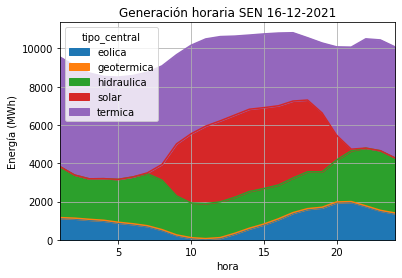

<Figure size 432x288 with 0 Axes>

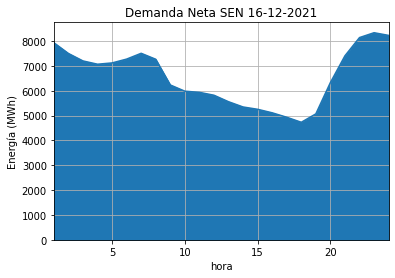

In [37]:
### Graficar generación por tecnología
df_caso.reset_index().pivot('hora','tipo_central','generacion_sum').plot(kind='area', title='Generación horaria SEN 16-12-2021', grid=True,xlim=(1,24),ylabel='Energía (MWh)')
plt.figure()

#graficar Demanda Neta con ayuda de pivot_table
pd.pivot_table(df_caso, values=['Dda Neta'], index=['hora'],aggfunc=[np.sum]).plot(kind='area', title='Demanda Neta SEN 16-12-2021', grid=True,xlim=(1,24),legend=None, ylabel='Energía (MWh)')
plt.show()

<font color='red'> A partir del primer gráfico se observa que alrededor de las 8 se produce la primera rampa al aumentar la energía fotovoltaica, lo cual se ve de forma inversa en el segundo gráfico de demanda neta. 
Por otro lado, alrededor de las 20 horas el efecto rampa es aún mas pronunciado, cuando oscurece y la energía de plantas solares disminuye rápidamente.

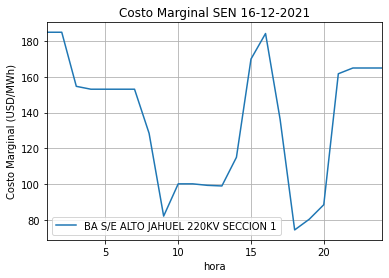

In [38]:
### Graficar precio de la energía de referencia
cmg.reset_index().pivot('hora','nombre','costo_en_dolares').plot(kind='line', title='Costo Marginal SEN 16-12-2021', grid=True,xlim=(1,24),ylabel='Costo Marginal (USD/MWh)')
plt.legend()
plt.show()

<font color='red'> Se observa que alrededor de las 8 de la mañana el precio de la energía disminuye abruptamente, al comenzar a generar energía las plantas solares (costo nulo de producción), produciendose la rampa de subida, luego cuando ocurre la rampa de bajada, con la salida de las plantas solares, el precio de la energía aumenta de forma importante, porque dichas plantas deben ser sustituidas por centrales con un mayor costo de producción, tales como, centrales con combustible Diésel

#Descarga desde SQL para encontrar errores en una muestra

1.   Elemento de lista
2.   Elemento de lista



**Uno de los desafíos de integración que estoy solucionando en mi trabajo es poder traer información desde una base SQL que contiene las muestras de disponibilidad de productos en la góndola de supermercados.**

**El usuario ingresa  un rango de fechas en Excel para traer la información, la cual queremos utilizar para varios usos:**

- Revisión de errores en la toma de muestra.
- Desarrollo de informes de disponibilidad de los productos.
- Cruzar la información con otras fuentes de datos para desarrollar modelos de predicción de quiebres de stock.

In [39]:
#La primera etapa es traer la solicitud de datos desde Excel, la cual viene en un archivo llamado params.csv
import pandas as pd
from datetime import datetime,date,timedelta

In [40]:
datos = '/content/drive/MyDrive/Colab Python/02. Obtencion y Procesamiento de Datos/params.csv'
params = pd.read_csv(datos, encoding='latin-1', sep = ',')
params = params[params.columns.drop(list(params.filter(regex='Unnamed')))] #limpiamos el archivo de origen
params.head

<bound method NDFrame.head of      Fecha Inicio   Fecha Fin  ... Comentario usuario_revision
0      12/20/2021  12/23/2021  ...        NaN          #VALUE!
1             NaN         NaN  ...        NaN          #VALUE!
2             NaN         NaN  ...        NaN          #VALUE!
3             NaN         NaN  ...        NaN          #VALUE!
4             NaN         NaN  ...        NaN          #VALUE!
...           ...         ...  ...        ...              ...
4682          NaN         NaN  ...        NaN          #VALUE!
4683          NaN         NaN  ...        NaN          #VALUE!
4684          NaN         NaN  ...        NaN          #VALUE!
4685          NaN         NaN  ...        NaN          #VALUE!
4686          NaN         NaN  ...        NaN          #VALUE!

[4687 rows x 25 columns]>

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
#Con las funciones listadas a continuación obtenemos el rango de fechas  que debemos importar 
fechaDesde = datetime.strptime(params['Fecha Inicio'].iloc[0], '%m/%d/%Y')
fechaDesde_string = fechaDesde.strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]
fechaHasta = datetime.strptime(params['Fecha Fin'].iloc[0], '%m/%d/%Y')+timedelta(days = 1)
fechaHasta_string = fechaHasta.strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]
print('Importando datos desde: '+fechaDesde_string)
print('                 hasta: '+fechaHasta_string)

Importando datos desde: 2021-12-20 00:00:00.000
                 hasta: 2021-12-24 00:00:00.000


**Por motivos de seguridad y de no contar en Colab con la librería pyodbc no puedo colocar el acceso a la base SQL, por lo que se trabajará con el archivo de exportación que se obtiene al realizar la consulta.**

In [43]:
output = '/content/drive/MyDrive/Colab Python/02. Obtencion y Procesamiento de Datos/output.csv'
salida = pd.read_csv(output, encoding='latin-1', sep = ';')
salida.sort_values(by=['Marca_Evolet_Maestra','Local_OSA','created_at_datetime', '_airbyte_normalized_at'], inplace = True) #Ordena los valores
salida.drop_duplicates(subset=['_airbyte_m_r_hashid'], keep = 'first', inplace = True) #Se quitan los duplicados por la forma de realización de la consulta.
salida.drop(['_airbyte_forms_hashid', '_airbyte_ab_id', '_airbyte_emitted_at', '_airbyte_normalized_at', 'updated_at_datetime'], axis=1, inplace = True) #Se quitan columnas innecesarias.
salida #vemos el status actual del Dataframe con los datos. 

,l_disponibilidad,h_seleccione_producto,_airbyte_m_r_hashid,Local_OSA,form_name_OSA,created_at_datetime,deleted,code,user_name,Marca_Evolet_Maestra
0,SI,P1 BISTEC POSTA NEGRA V ATM KG,6214FAA2548C780DC9485BD0FC628E99,107-SISA-CONCEPCIÓN-21 DE MAYO,Carne SISA VIII,2021-12-20 12:41:00,False,547,Ingrid Bahamonde,CARNE
1,SI,P2 BISTEC POSTA ROSADA V ATM KG,A802FF1BE8EF56DC6319C1C49A41AAFD,107-SISA-CONCEPCIÓN-21 DE MAYO,Carne SISA VIII,2021-12-20 12:41:00,False,547,Ingrid Bahamonde,CARNE
2,SI,P3 CARNE MOLIDA 10% GR 320G o 250G,FDFC6E786F9384F5FC88F9BBC8B08205,107-SISA-CONCEPCIÓN-21 DE MAYO,Carne SISA VIII,2021-12-20 12:41:00,False,547,Ingrid Bahamonde,CARNE
3,SI,P4 MOLIDA ESP 7% 320G o 250G,6D603D10330C32F5F4E00C6FF25E52B2,107-SISA-CONCEPCIÓN-21 DE MAYO,Carne SISA VIII,2021-12-20 12:41:00,False,547,Ingrid Bahamonde,CARNE
4,SI,P5 TARTARO 4% 250G o 320G,B0E7A8FD997073607265FA6901578767,107-SISA-CONCEPCIÓN-21 DE MAYO,Carne SISA VIII,2021-12-20 12:41:00,False,547,Ingrid Bahamonde,CARNE
...,...,...,...,...,...,...,...,...,...,...
9501,SI,P1 POLLO ASADO UN o KG,3567FA8769E1588E3139F559BD04CD6E,SISA CASAS DE VALENCIA I L813,Evaluación Preparados SISA,2021-12-22 14:08:00,False,6135,Alejandra Olivares,PREPARADOS
9502,SI,P1 POLLO ASADO UN o KG,75E5AF42C5E6112F1FB68EB750858F9C,SISA EL GABINO,Evaluación Preparados SISA,2021-12-20 21:22:00,False,6100,Catalina Varela,PREPARADOS
9503,NO,P1 POLLO ASADO UN o KG,21815DBC91A2C6AA1CDA271C8B2148E7,SISA HUECHURABA P. FONTOVA,Evaluación Preparados SISA,2021-12-21 16:20:00,False,6119,Ignacio Videla,PREPARADOS
9504,SI,P1 POLLO ASADO UN o KG,612EE1CCA84F47DEC377F64FD303A0E1,SISA PORTAL EL BELLOTO L781,Evaluación Preparados SISA,2021-12-20 17:40:00,False,6086,Alejandra Olivares,PREPARADOS


**Para efectos de este caso de uso, se buscarán todos los registros dónde la disponibilidad está en blanco, lo cual significa que hay un error en la toma de la muestra. Éste es uno de los 3 errores que buscamos detectar, junto a los reportes duplicados y los que faltaron por realizar.**

In [44]:
salida2 = filtered_salida = salida[salida['l_disponibilidad'].isnull()]
salida2

,l_disponibilidad,h_seleccione_producto,_airbyte_m_r_hashid,Local_OSA,form_name_OSA,created_at_datetime,deleted,code,user_name,Marca_Evolet_Maestra
160,NaN,P2 BISTEC POSTA ROSADA V ATM KG,9E2418C1C78450A2EB91E428960DE66D,216-SISA LOS ANGELES VILLAGRÁN,Carne SISA VIII,2021-12-20 12:46:00,False,548,Carolina Sone,CARNE
3583,NaN,P22 MOLDE BLANCO 560G C&CO,AC89129340402891975180758682F993,654 - SISA MAIPU CIUDAD SATELI,Evaluación Panadería SISA,2021-12-22 02:33:00,False,6149,Karen Bobadilla,PANADERIA
7392,NaN,P8 TARTALETA DE FRUTAS MIXTAS MEDIANA,23BB4357BAAB6A36746D802D6C9CEA15,276-SISA FLORIDA-AV.FLORIDA 10,Evaluación Pastelería SISA,2021-12-20 21:12:00,False,6124,Patricia Flores,PASTELERIA
7774,NaN,P6 TORTA SACHER 15P,422FF03FE03D3A0A8ADF0A806D8123C6,732-TEMUCO MANUEL RODRÍGUEZ,Evaluación Pastelería SISA,2021-12-20 14:53:00,False,6099,Patricio Lagos,PASTELERIA
8139,NaN,P14 TORTA CARROT CAKE,9DC4D54637999C7C4AC854786C679005,JUMBO ALESSANDRI HUALPEN,Especial Evaluación Pastelería Jumbo,2021-12-21 17:37:00,False,2407,Mirta Gajardo,PASTELERIA
8175,NaN,P16 TORTA SAN JORGE GUINDA,960976CF712C981D10515591D728CE18,JUMBO ANTOFAGASTA ANGAMOS (L.534),Especial Evaluación Pastelería Jumbo,2021-12-21 14:46:00,False,2402,Jessica Orellana,PASTELERIA
8176,NaN,P32 TORTA BEATRIZ 15P,AECD1070EFB01B61106DD797ACB3C84A,JUMBO ANTOFAGASTA ANGAMOS (L.534),Especial Evaluación Pastelería Jumbo,2021-12-21 14:46:00,False,2402,Jessica Orellana,PASTELERIA
8712,NaN,P14 TORTA CARROT CAKE,338175004F91321BF4A1D0F955ABB476,JUMBO MALL CENTER CONCEPCION,Especial Evaluación Pastelería Jumbo,2021-12-20 20:59:00,False,2397,Mirta Gajardo,PASTELERIA


**Podemos ver que hay 8 muestras que deben ser corregidas por los supervisores, ya que no completaron el estado del producto en la góndola.**

## códigos de categorias de columnas sin usar merge
Este caso se enfoca en el uso de categorías y el cambio de su codificación sin usar merge 

Primero se lee el archivo y se categorizan las columnas que con códigos

In [45]:
path_file: str = r'/content/drive/MyDrive/Colab Python/02. Obtencion y Procesamiento de Datos/OD_database.csv'

df2 = pd.read_csv(path_file, sep=";", index_col=0) #lee archivos
df2['Operation Code']= df2['Operation Code'].astype("category") #columna Operation Code se reclasifica como category
df2['Zone Code']= df2['Zone Code'].astype("category") #columna Zone Code se reclasifica como category
df2['Country Code']= df2['Country Code'].astype("category") #columna Country Code se reclasifica como category
df2

,Operation Code,Zone Code,Country Code,Sales 2019,Sales 2020,Sales 2021,Target 2021
ID,,,,,,,
1,A,2,ES,372209,293961,127019,261768
2,NaN,4,CN,135078,149837,334445,236582
3,C,1,US,510560,361994,270752,236232
4,D,3,CL,599200,347447,247951,220181
5,A,2,DE,156092,364146,395201,255603
6,A,4,JP,138977,127593,218404,265954
7,B,1,CA,365449,364568,201645,220850
8,NaN,1,US,464930,220109,207445,219133
9,B,2,FR,379077,197311,325589,220092


Posteriormente se define un diccionario, donde los keys() son las categorias actuales, y values() el valor a renombrar

In [46]:
data11 = {'A':'Minerals', 'B':'Shipping', 'C':'Finance', 'D':'infraestructure'} #reclasifación columna Operation Code 
df2['Operation Code'] = df2['Operation Code'].cat.rename_categories(data11) #reemplazo

data12 = {1:'North America', 2:'Europe', 3:'South America', 4:'Asia'} #reclasifación columna Zone Code 
df2['Zone Code'] = df2['Zone Code'].cat.rename_categories(data12) #reemplazo

data13 ={'ES':'Spain', 'CN':'China', 'US':'United States of America', 'CL':'Chile', 'DE':'Germany', 'JP':'Japan', 'CA':'Canada',
         'PE':'Peru', 'FR':'France', 'UK':'United Kingdom', 'VT':'Vietnam', 'PT':'Portugal', 'AR':'Argentina', 'BR':'Brazil', 'CO':'Colombia', 'TH':'Thailand'} 
         #reclasifación columna Country Code 
df2['Country Code'] = df2['Country Code'].cat.rename_categories(data13) #reemplazo

df2 #Aqui esta la tabla reclasificada

,Operation Code,Zone Code,Country Code,Sales 2019,Sales 2020,Sales 2021,Target 2021
ID,,,,,,,
1,Minerals,Europe,Spain,372209,293961,127019,261768
2,NaN,Asia,China,135078,149837,334445,236582
3,Finance,North America,United States of America,510560,361994,270752,236232
4,infraestructure,South America,Chile,599200,347447,247951,220181
5,Minerals,Europe,Germany,156092,364146,395201,255603
6,Minerals,Asia,Japan,138977,127593,218404,265954
7,Shipping,North America,Canada,365449,364568,201645,220850
8,NaN,North America,United States of America,464930,220109,207445,219133
9,Shipping,Europe,France,379077,197311,325589,220092
